# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [1]:
import pandas as pd

df = pd.read_csv('Employee_productivity.csv')

df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


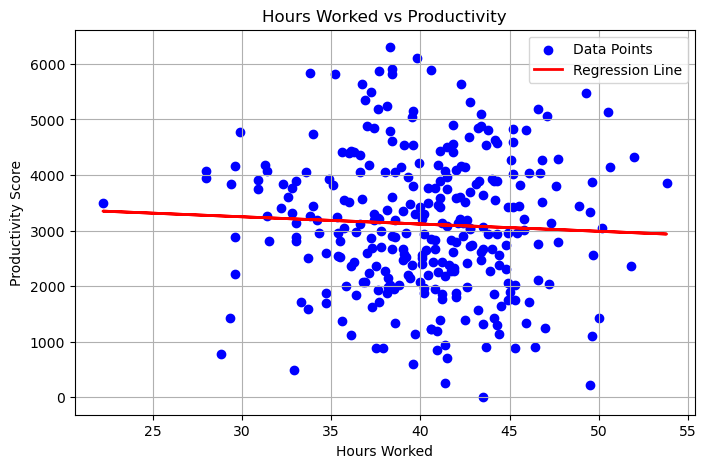

R² for Hours Worked: 0.0026


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df[['HoursWorked']]
y = df['ProductivityScore']

model_hours = LinearRegression()
model_hours.fit(X, y)

pred_hours = model_hours.predict(X)
r2_hours = r2_score(y, pred_hours)

plt.figure(figsize=(8,5))
plt.scatter(df['HoursWorked'], y, color='blue', label='Data Points')
plt.plot(df['HoursWorked'], pred_hours, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Hours Worked")
plt.ylabel("Productivity Score")
plt.title("Hours Worked vs Productivity")
plt.legend()
plt.grid(True)
plt.show()

print("R² for Hours Worked:", round(r2_hours, 4))


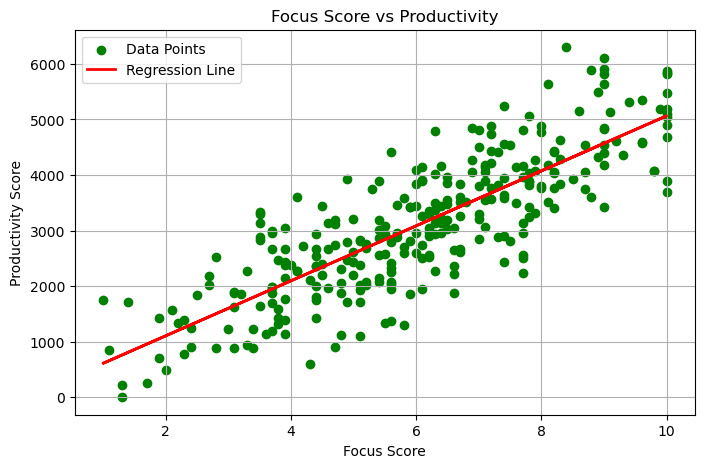

R² for Focus Score: 0.6777


In [3]:
X = df[['FocusScore']]
y = df['ProductivityScore']

model_focus = LinearRegression()
model_focus.fit(X, y)

pred_focus = model_focus.predict(X)
r2_focus = r2_score(y, pred_focus)

plt.figure(figsize=(8,5))
plt.scatter(df['FocusScore'], y, color='green', label='Data Points')
plt.plot(df['FocusScore'], pred_focus, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Focus Score")
plt.ylabel("Productivity Score")
plt.title("Focus Score vs Productivity")
plt.legend()
plt.grid(True)
plt.show()

print("R² for Focus Score:", round(r2_focus, 4))


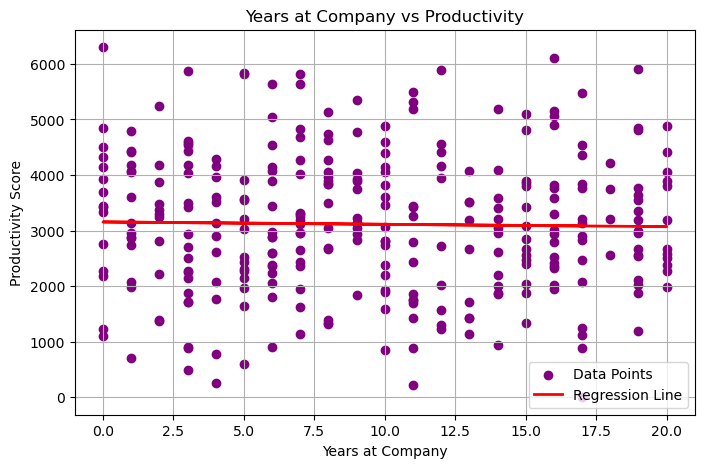

R² for Years at Company: 0.0004


In [4]:
X = df[['YearsAtCompany']]
y = df['ProductivityScore']

model_years = LinearRegression()
model_years.fit(X, y)

pred_years = model_years.predict(X)
r2_years = r2_score(y, pred_years)

plt.figure(figsize=(8,5))
plt.scatter(df['YearsAtCompany'], y, color='purple', label='Data Points')
plt.plot(df['YearsAtCompany'], pred_years, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Years at Company")
plt.ylabel("Productivity Score")
plt.title("Years at Company vs Productivity")
plt.legend()
plt.grid(True)
plt.show()

print("R² for Years at Company:", round(r2_years, 4))


In [5]:
numeric_features = ['HoursWorked','FocusScore','YearsAtCompany','TeamMeetingsPerWeek']
target = 'ProductivityScore'

results = {}

for feature in numeric_features:
    X = df[[feature]]
    y = df[target]
    
    model = LinearRegression()
    model.fit(X, y)
    
    preds = model.predict(X)
    r2 = r2_score(y, preds)
    
    results[feature] = round(r2, 4)

results


{'HoursWorked': 0.0026,
 'FocusScore': 0.6777,
 'YearsAtCompany': 0.0004,
 'TeamMeetingsPerWeek': 0.0542}